In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
df= pd.read_csv('Perrin Freres monthly champagne sales millions.csv')

In [59]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [60]:
df.tail(5)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [61]:
df.columns=['Month','Sales']

In [62]:
df.head(2)

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0


In [63]:
df.drop([106,105],axis=0,inplace=True)

In [64]:
df.tail(4)

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [65]:
df['Month']=pd.to_datetime(df['Month'])

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [67]:
df.head(5)

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [68]:
df['Month'].value_counts()

1968-05-01    1
1970-08-01    1
1972-03-01    1
1965-04-01    1
1965-03-01    1
             ..
1969-01-01    1
1964-09-01    1
1964-08-01    1
1964-07-01    1
1970-01-01    1
Name: Month, Length: 105, dtype: int64

In [69]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


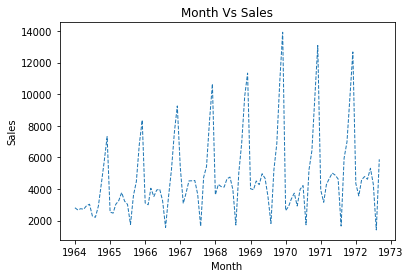

In [83]:
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Month Vs Sales')
plt.plot(df['Month'],df['Sales'],linewidth=1,linestyle='dashed')
plt.show()

In [71]:
from statsmodels.tsa.stattools import adfuller

In [72]:
test_result = adfuller(df['Sales'])

In [73]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistics','p_value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+" : "+str(value))
    if result[1] <= 0.05:
        print('strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary')
    else:
        print('weak evidence against the null hypothesis, time series has a unit root indicating it is non-stationary')

In [74]:
adfuller_test(df['Sales'])

ADF Test Statistics : -1.8335930563276195
p_value : 0.3639157716602467
#Lags Used : 11
Number of Observations Used : 93
weak evidence against the null hypothesis, time series has a unit root indicating it is non-stationary
